In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6,4)

In [14]:
df = pd.read_csv("/911.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Finds the most active townships.


In [17]:
df['twp'].value_counts().head()

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


how many different types of emergencies are there

In [18]:
df['title'].nunique()


148

In [19]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

EMS = medical

Fire = fire-related

Traffic = car crashes, etc.

To find How many EMS, Traffic, or Fire calls.

In [20]:
df['reason'].value_counts()


,count
reason,
EMS,332692
Traffic,230208
Fire,100622


Bar Plot of Call Reasons

<Axes: xlabel='count', ylabel='reason'>

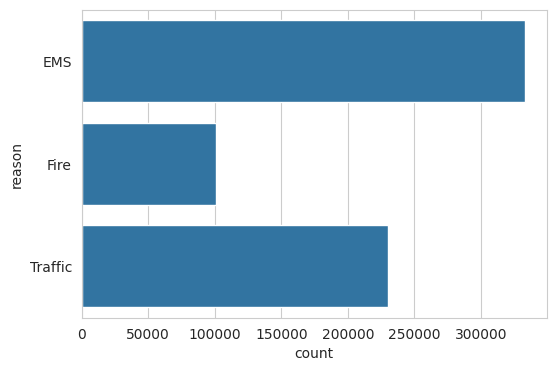

In [21]:
sns.countplot(df['reason'])


In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

Changes 0 to "Mon", 1 to "Tue", etc. for readability

In [24]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(daymap)

Bar chart of calls on each weekday

<Axes: xlabel='count', ylabel='dayofweek'>

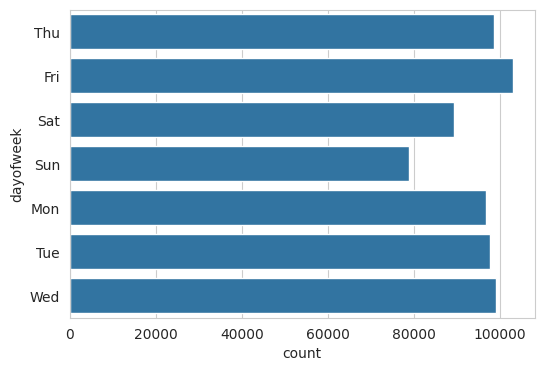

In [25]:
sns.countplot(df['dayofweek'])

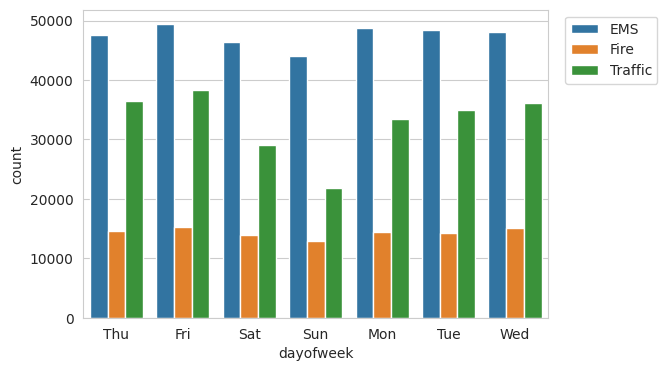

In [26]:
sns.countplot(x=df['dayofweek'], hue=df['reason'])
plt.legend(bbox_to_anchor=(1.25,1))

Text(0, 0.5, 'Number of Calls')

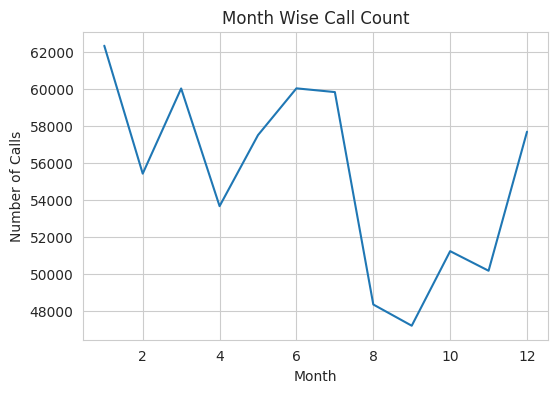

In [27]:
byMonth = df.groupby(by='Month').count()
byMonth['title'].plot.line()
plt.title('Month Wise Call Count')
plt.ylabel('Number of Calls')

Heatmap of Day vs Hour

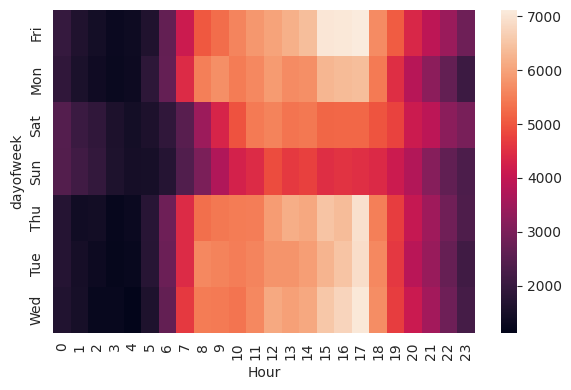

In [28]:
day_hour = df.pivot_table(values='title', index='dayofweek', columns='Hour', aggfunc='count')
sns.heatmap(day_hour)
plt.tight_layout()

Shows what hour on what day gets the most 911 calls.

Brighter color = more calls.